Import the required libraries

In [1]:
pip install six

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [3]:
import six

In [26]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

Read the Data from the CSV

In [27]:
dummy_df=pd.read_csv("C:/Users/Kavya/Downloads/bank.csv")
temp=dummy_df.columns.values
temp

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'deposit'],
      dtype=object)

In [28]:
dummy_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [29]:
dummy_df.drop(['contact'],axis=1)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,8,may,9,2,172,5,failure,no


Data Pre_Processing

In [30]:
contact_df=dummy_df

In [31]:
def preprocessor(df):
    res_df=df.copy()
    le=preprocessing.LabelEncoder()
    
    res_df['job'] = le.fit_transform(res_df['job'])
    res_df['marital'] = le.fit_transform(res_df['marital'])
    res_df['education'] = le.fit_transform(res_df['education'])
    res_df['default'] = le.fit_transform(res_df['default'])
    res_df['housing'] = le.fit_transform(res_df['housing'])
    res_df['month'] = le.fit_transform(res_df['month'])
    res_df['loan'] = le.fit_transform(res_df['loan'])
    res_df['contact'] = le.fit_transform(res_df['contact'])
    res_df['day_of_week'] = le.fit_transform(res_df['day'])
    res_df['poutcome'] = le.fit_transform(res_df['poutcome'])
    res_df['deposit'] = le.fit_transform(res_df['deposit'])
    
    return res_df

In [32]:
encoded_df = preprocessor(contact_df)

x=encoded_df.drop(['deposit'],axis=1).values
y=encoded_df['deposit'].values

Split the data into Train-Test

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

Hyper-Parameter Optimization using GridSearchCV


In [79]:
import time
start = time.time()

param_dist = {'max_depth': [4,5,6,7,8,9],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']
              }

cv_df = GridSearchCV(fit_df, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_df.fit(x_train,y_train)
print('Best Parameters using grid search: \n', cv_df.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 8, 'max_features': None}
Time taken in grid search:  6.22


In [80]:
#decision tree with depth = 8
model_dt_8 = DecisionTreeClassifier(random_state=1,max_depth=8)
model_dt_8.fit(x_train,y_train)
model_dt_8_score_train=model_dt_8.score(x_train,y_train)
print("Training score: ",model_dt_8_score_train)
model_dt_8_score_test=model_dt_8.score(x_test,y_test)
print("Testing score: ",model_dt_8_score_test)

Training score:  0.8577668271922948
Testing score:  0.8092252575011196


In [82]:
#decision tree

model_dt=DecisionTreeClassifier(max_depth = 8,criterion="entropy")
model_dt.fit(x_train,y_train)
y_pred_dt = model_dt.predict_proba(x_test)[:,1]

Performance Metrics

In [83]:
fpr_dt,tpr_dt, _ =roc_curve(y_test,y_pred_dt)
roc_auc_dt = auc(fpr_dt,tpr_dt)

In [84]:
predictions = model_dt.predict(x_test)
predictions

array([1, 1, 0, ..., 0, 1, 0])

In [85]:
y_actual_result=0
for i in range(len(predictions)):
    if(predictions[i] == 1):
        y_actual_result = np.vstack((y_actual_result, y_test[i])) 

Recall

In [86]:
#recall
y_actual_result = y_actual_result.flatten()
count=0
for result in y_actual_result:
    if(result ==1):
        count=count+1
        
print("true yes |predicted yes:")
print(count/float(len(y_actual_result)))

true yes |predicted yes:
0.7898148148148149


Area Under the Curve

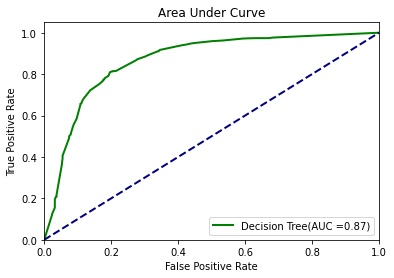

In [87]:
plt.figure(1)
lw=2
plt.plot(fpr_dt,tpr_dt,color='green',
        lw=lw,label='Decision Tree(AUC =%0.2f)' % roc_auc_dt)
plt.plot([0,1],[0,1], color='navy',lw=lw,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

Confusion Matrix


In [88]:
print(confusion_matrix(y_test ,predictions))

[[940 226]
 [214 853]]


In [89]:
accuracy_score(y_test,predictions)

0.8029556650246306

In [90]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model,normalize=False): #This function prints and plots the confusion matrix.
    cm=confusion_matrix(y_test,model,labels=[0,1])
    classes=["Success","Default"]
    cmap=plt.cm.Blues
    title ="Confusion Matrix"
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        cm=np.around(cm,decimals=3)
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    thresh = cm.max() /2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizontalalignment="center",
                color="white" if cm[i,j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

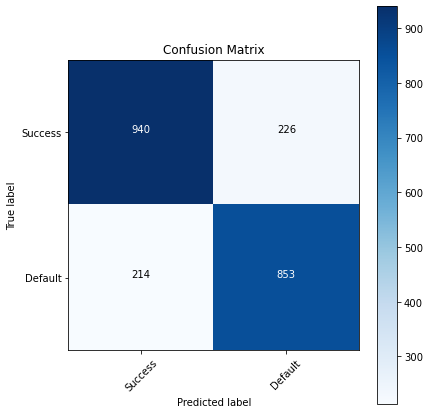

In [91]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(predictions,normalize=False)
plt.show()